<a href="https://colab.research.google.com/github/BasmaAfreen/Stats-DeepLearning_Projects/blob/main/Clustering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df=pd.read_excel("EastWestAirlines.xlsx" , sheet_name='data')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000


- the range of   cc1_miles	cc2_miles	cc3_miles Flight_trans_12  is very small.
-  in Flight_miles_12mo   min and 25 % 50% is at 0 ,hence  even if outliers are present it is not necessary to remove.
-  IN Qual_miles  min  &  iqr range is 0 , hence  even if outliers are present it is not necessary to remove.  


#### **Scientific Notation**: When the range of numbers in a column is wide, pandas automatically uses scientific notation for readability.

In [ ]:
# Get summary statistics
summary_stats = df["Balance"].describe()
# Display summary statistics with float format
formatted_summary_stats = summary_stats.apply(lambda x: '{:.2f}'.format(x))
formatted_summary_stats

count       3999.00
mean       73601.33
std       100775.66
min            0.00
25%        18527.50
50%        43097.00
75%        92404.00
max      1704838.00
Name: Balance, dtype: object

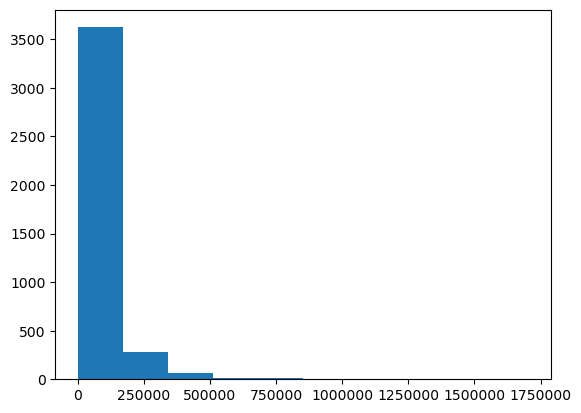

In [ ]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter



# Create histogram
plt.hist(x=df["Balance"])

# Set scalar formatter for x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
#Gets the current axis,  applies the scalar formatter to the x-axis.

ax.ticklabel_format(useOffset=False, style='plain', axis='x')
# Ensures x-axis labels are plain, not scientific
#useOffset=False: Disables the offset notation on the x-axis.
#ticklabel_format(): Ensures the x-axis labels are displayed in plain format, not scientific notation.

plt.show()


# 1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary

In [ ]:
#To check  missing values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [ ]:
df["Award?"].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [ ]:
df["Qual_miles"].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [ ]:
df["cc3_miles"].value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [ ]:
df["cc2_miles"].value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [ ]:
df["cc1_miles"].value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

# EDA
 1. plot box plot to identify outliers.
 2. calculate the outliers.
 3. if outliers ar present remove them.

In [ ]:
df.skew()

ID#                  -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

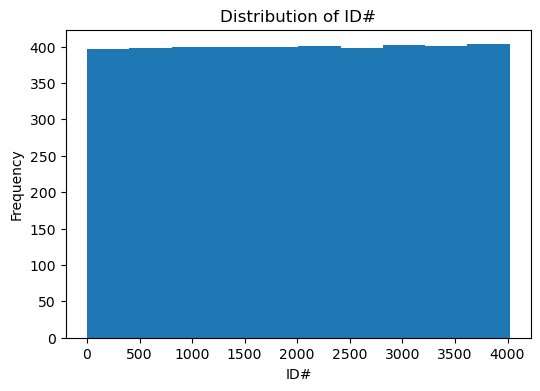

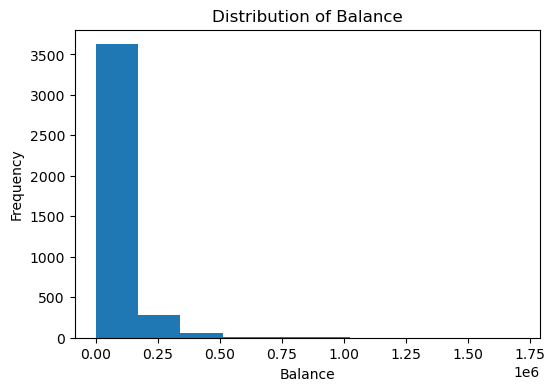

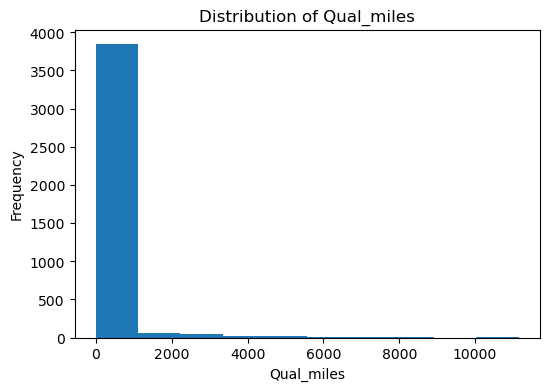

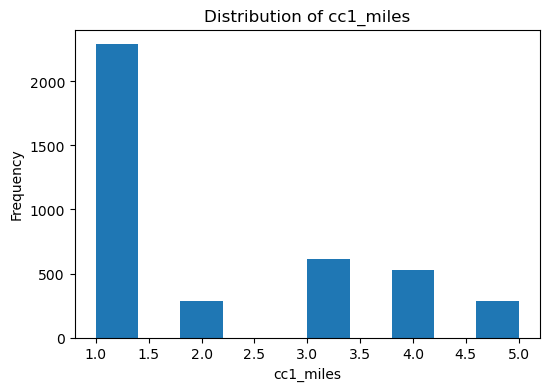

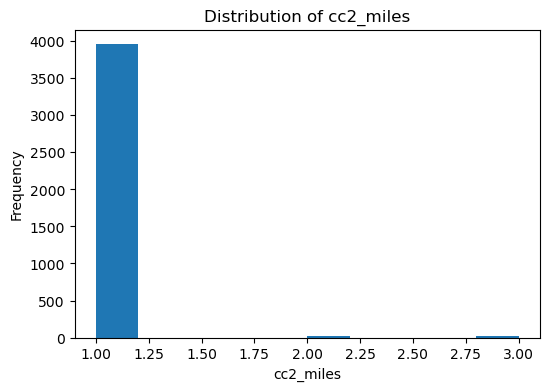

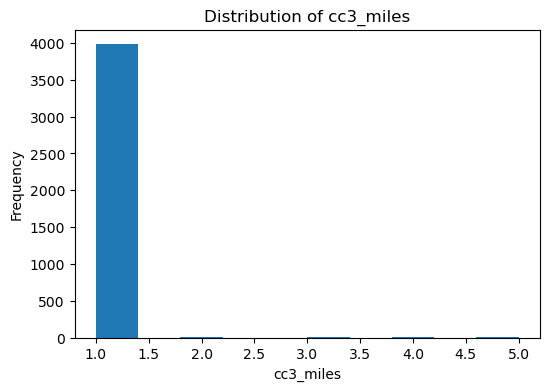

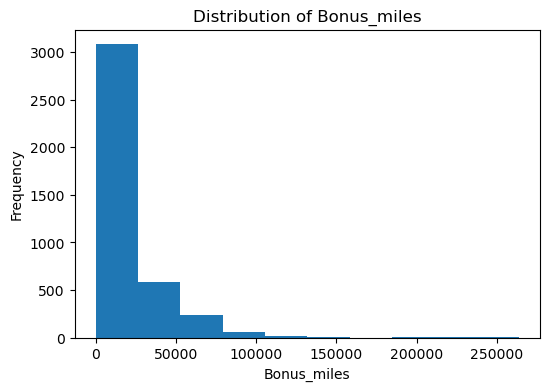

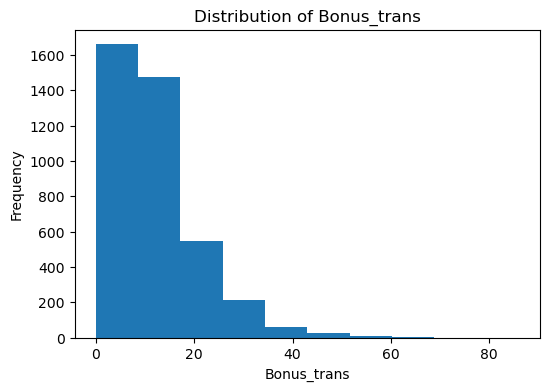

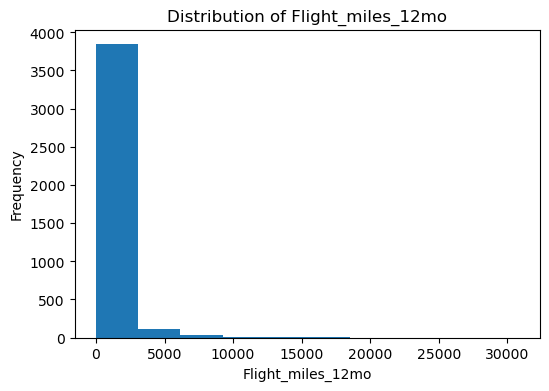

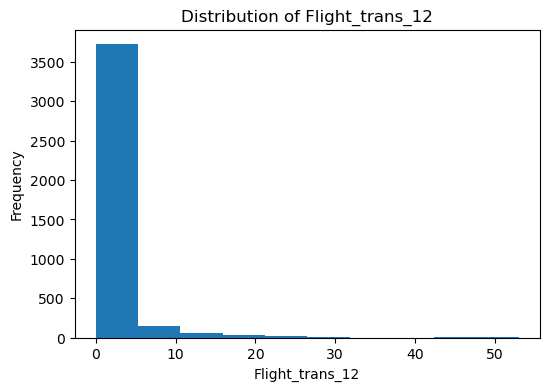

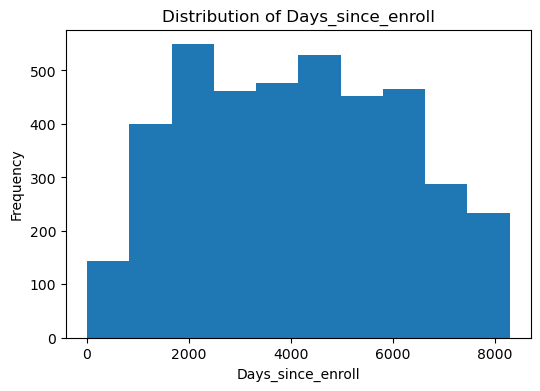

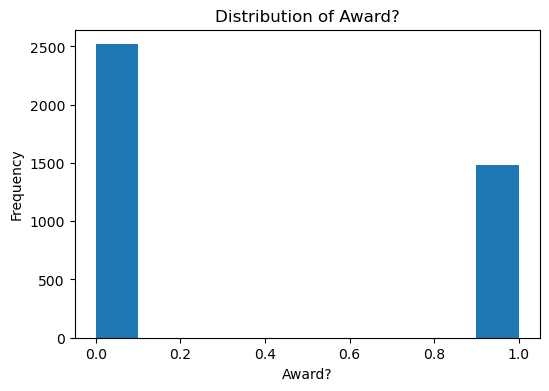

In [ ]:
num_columns=df.select_dtypes(include=("number")).columns


# Plot hist for each continous column using matplotlib to analyse data distribution
# Loop through each continous  column and plot histogram
for col in num_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


#### this  variables   cc1_miles, cc2_miles, cc3_miles, Bonus_trans, Flight_trans_12(It counts the number of flight transactions in the past 12 months, is a discrete variable..), and Award? &  Balance,Qual_miles, Bonus_miles, Flight_miles_12mo, Days_since_enroll  variables  data is  continous
(Distance is a continuous measurement)

- only  **Days_since_enroll  variable is folowing normal distribution.**
- ***Balance	Qual_miles		Bonus_miles	Bonus_trans	Flight_miles_12mo	Flight_trans_12 variable are not  following normal distribution.***
- The data distribution is POSITIVELY skewed (most of the data is distributed on the left side)(confirming the presence of extrem values),  
  **indicating the presence of outliers**


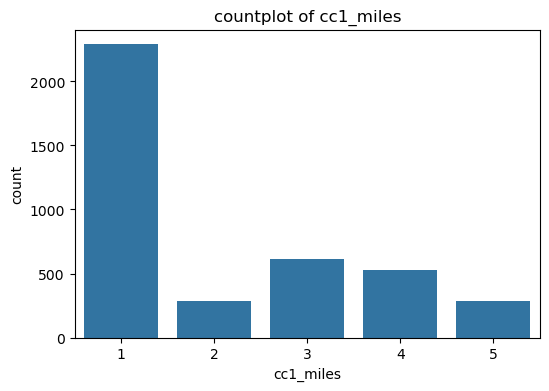

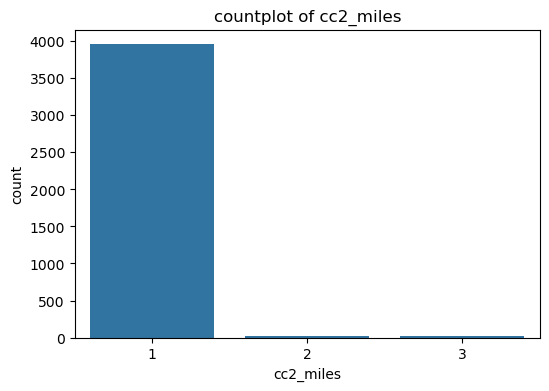

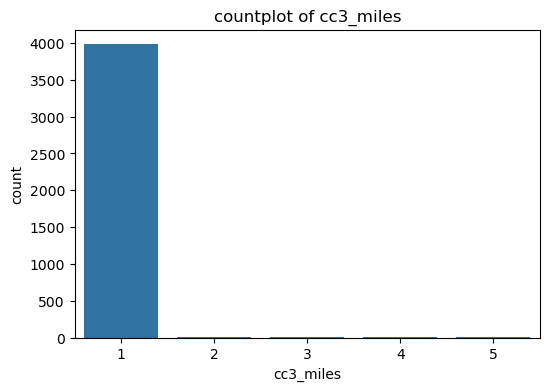

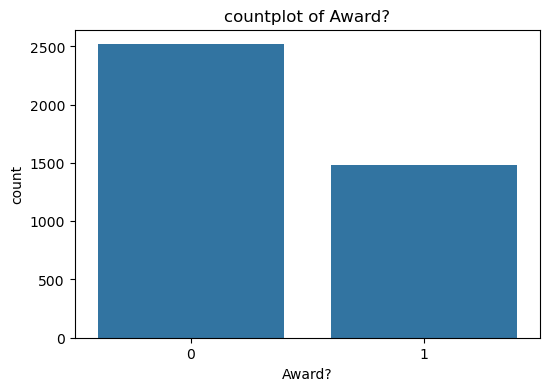

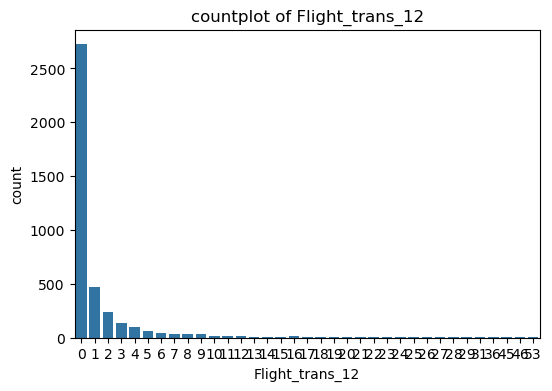

In [ ]:

#category_col=df.select_dtypes(include=['object']).columns  selects only one bcz only one var is of object type

category_col=["cc1_miles","cc2_miles","cc3_miles" ,"Award?","Flight_trans_12"]

# Plot countplot(bar graph) for each discrete column using matplotlib to  compare categories.
# Loop through each continous  column and plot countplot
for col in category_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"countplot of {col}")
    plt.show()

cc1_miles: 1

- The passenger has earned 1 mile through the first credit card program.

cc2_miles: 1

- The passenger has earned 1 mile through the second credit card program.

cc3_miles: 1

- The passenger has earned 1 mile through the third credit card program

-  **Through the first, second and third credit card program, most of the passenger  have earned 1 miles.**
-  **Award?:  most of the passenger  did not  received a reward (1 means yes, 0 means no).**

-------------------------------------------------------------------------------------------------------------
-  **most of the passenger  has taken 0 flights in the last 12 months**


- - **Flight_miles_12mo:  Miles flown in the last year.
- ex : The passenger has flown 0 miles in the last 12 months.

- **Flight_trans_12: Number of flights taken in the last year.
-   ex : The passenger has taken 0 flights in the last 12 months.
-   *ex 2 :In the last 12 months, they have flown 1,198 miles over 3 flights. It has been 1,424 days since the passenger enrolled in the loyalty program.*
-------------------------------------------------------------------------


-  Bonus_miles: Extra miles earned from special offers or promotions.
-   **most of the passenger earned  Extra miles  from special offers   in range of 1250 - 23800.**
-   Bonus_trans: How many times extra miles were earned. or    Number of transactions through which bonus miles were earned
-   **most of the passenger earned total  Extra miles  from special offers   in range of 3 to 17(iqr range )  or 0 to 86(min , max).**


# ----------------------------------------------------------------------------------------------------------------------------------------

- the range of   cc1_miles	cc2_miles	cc3_miles Flight_trans_12  is very small.
-  in Flight_miles_12mo   min and 25 % 50% is at 0 ,hence  even if outliers are present it is not necessary to remove.
-  IN Qual_miles  min  &  iqr range is 0 , hence  even if outliers are present it is not necessary to remove.  
---------------------------------------------------------------------------------------------------------------------------------------------------------
- only  **Days_since_enroll  variable is folowing normal distribution.**
- ***Balance	Qual_miles		Bonus_miles	Bonus_trans	Flight_miles_12mo	Flight_trans_12 variable are not  following normal distribution.***
- The data distribution is POSITIVELY skewed (most of the data is distributed on the left side)(confirming the presence of extrem values),  
  **indicating the presence of outliers**
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
***Through the first, second and third credit card program, most of the passenger  have earned 1 miles.**
-  ***Award?:  most of the passenger  did not  received a reward (1 means yes, 0 means no).**
-  ***most of the passenger  has taken 0 flights in the last 12 months & avg Miles flown is  460  in the last 12 months.***
-  **most of the passenger's (Qual_miles )qualifying_miles is 0**


-----------------------------------------------------------------------------------------------
-   **most of the passenger earned  Extra miles  from special offers   in range of 1250 - 23800.**
-   **most of the passenger earned total  Extra miles  from special offers   in range of 3 to 17(iqr range )  or 0 to 86(min , max).**


### as we can observe in this variables  Qual_miles ,cc1_miles	,cc2_miles,	cc3_miles, Flight_trans_12 ,range is very less  and max values lies on 0 and 1 hence no need to remove outliers .....the outliers should be removed from   Balance , Bonus_miles,	Bonus_trans  bcz range is high  & not  following normal distribution,

## ---------------------------------------------------------------------------------------------------------------------------------------------------------

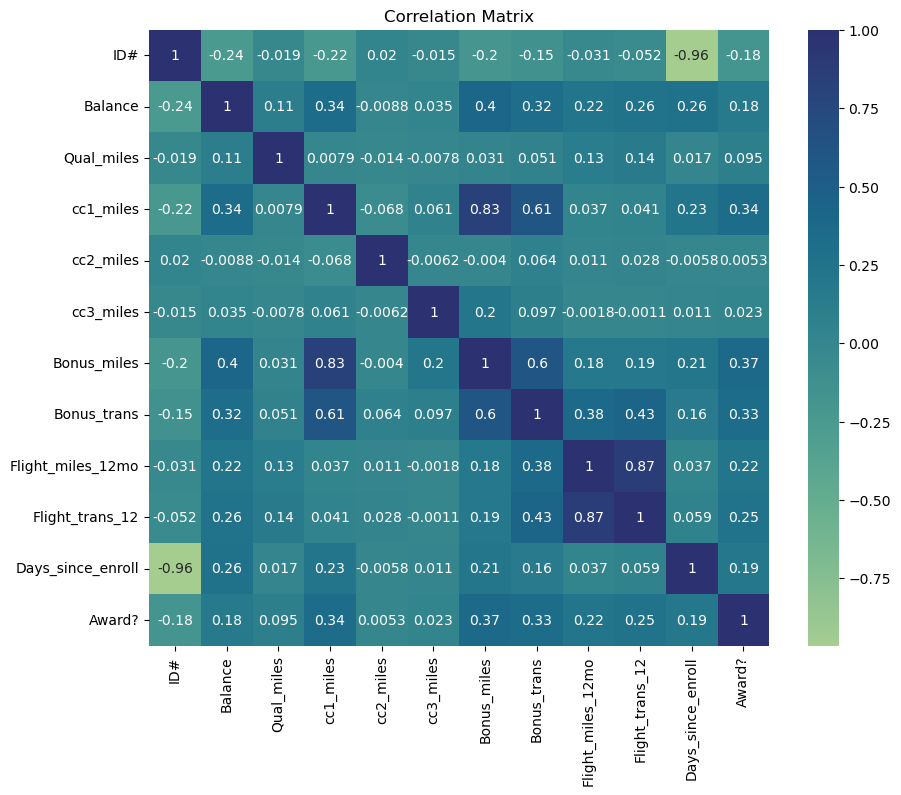

In [ ]:
numeric_data = df.select_dtypes(include=["number"])
#df1=df.iloc[:,[0,1,2,4,10]]

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest")
plt.title("Correlation Matrix")
plt.show()

## boxplot

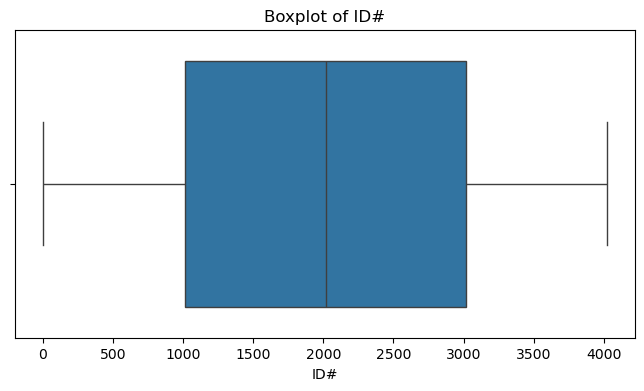

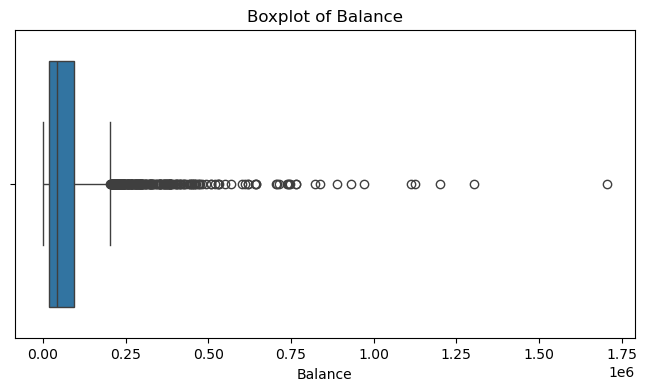

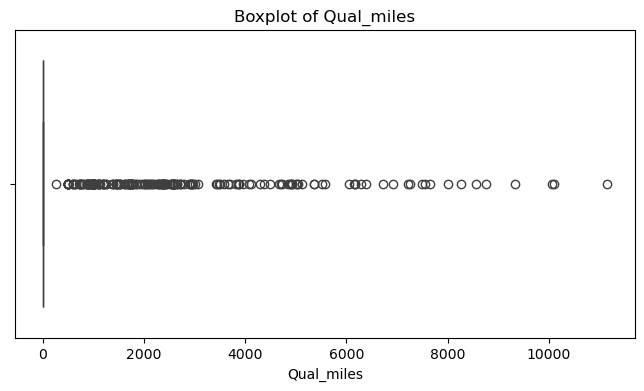

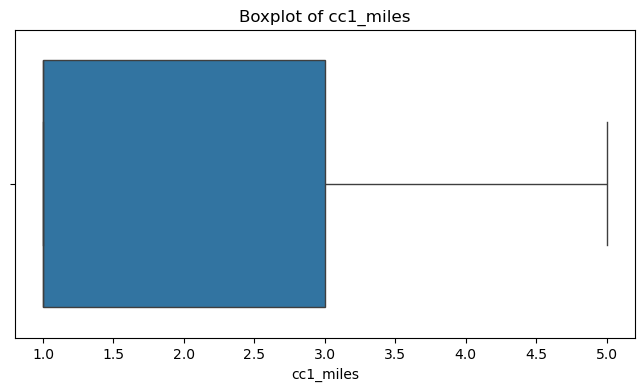

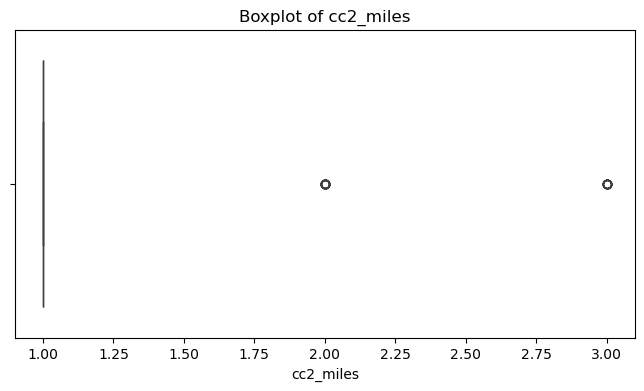

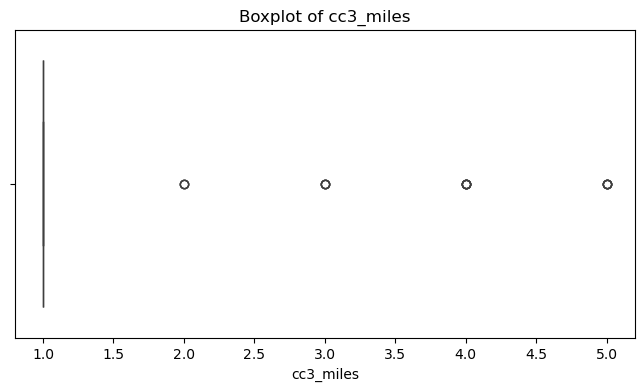

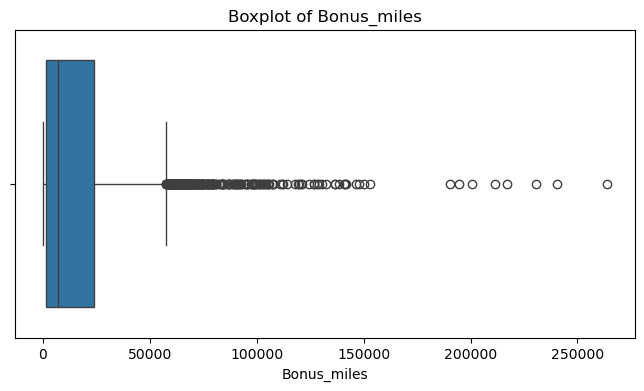

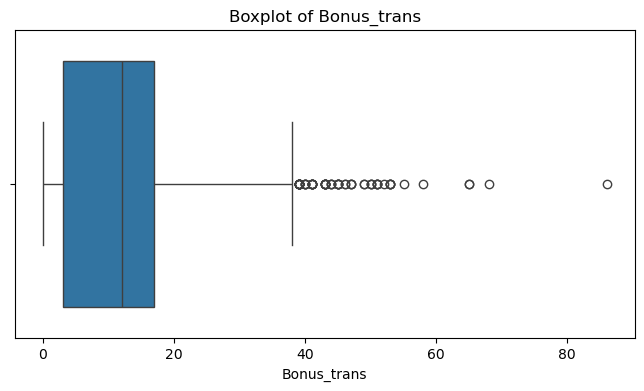

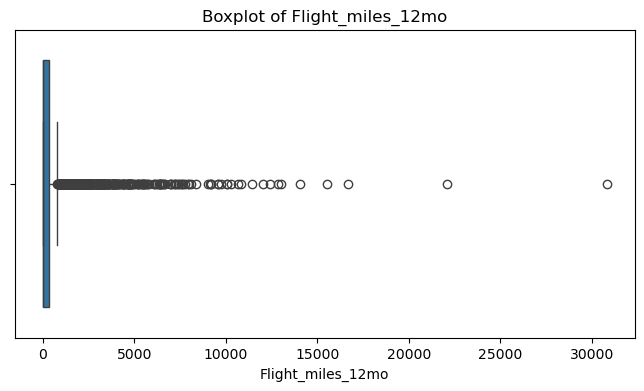

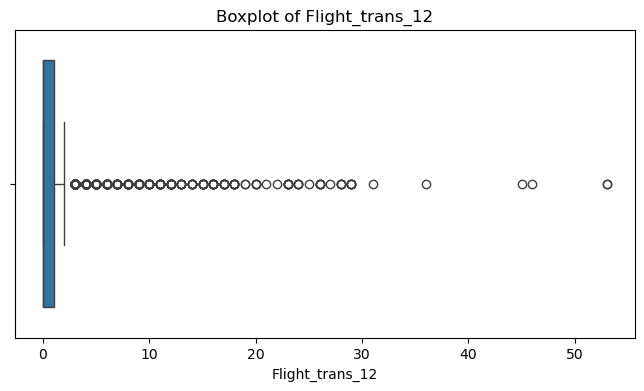

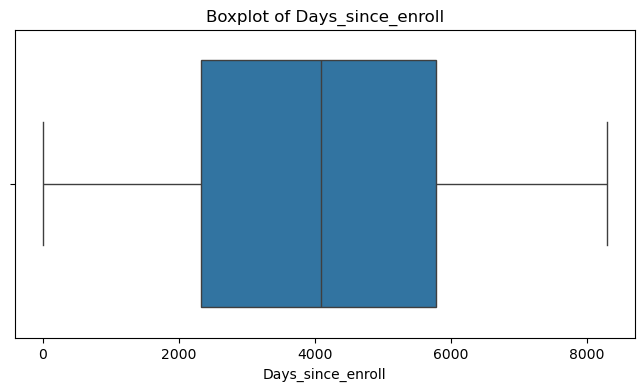

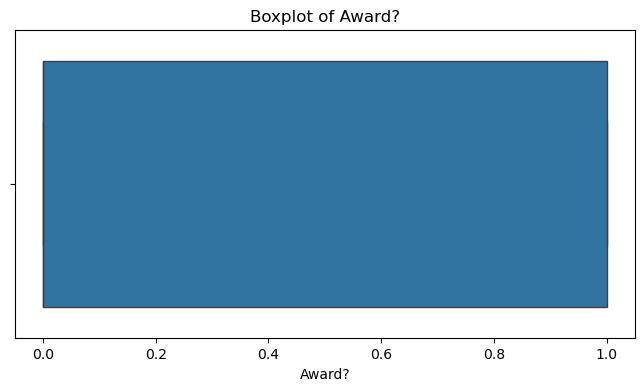

In [ ]:
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()

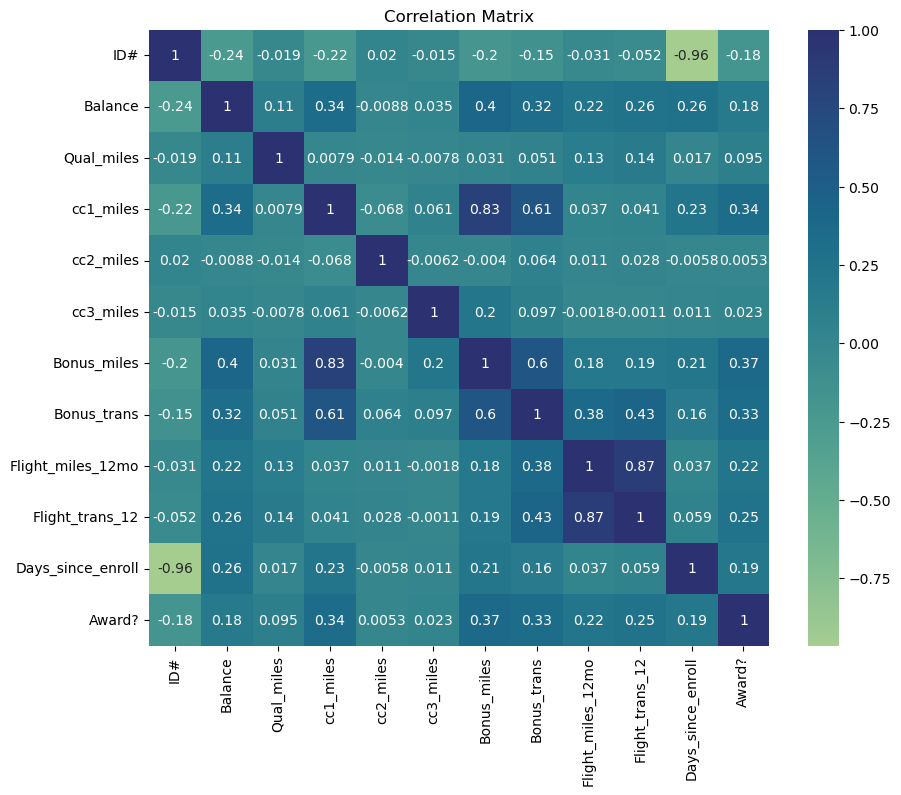

In [ ]:
numeric_data = df.select_dtypes(include=["number"])
#df1=df.iloc[:,[0,1,2,4,10]]

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest")
plt.title("Correlation Matrix")
plt.show()

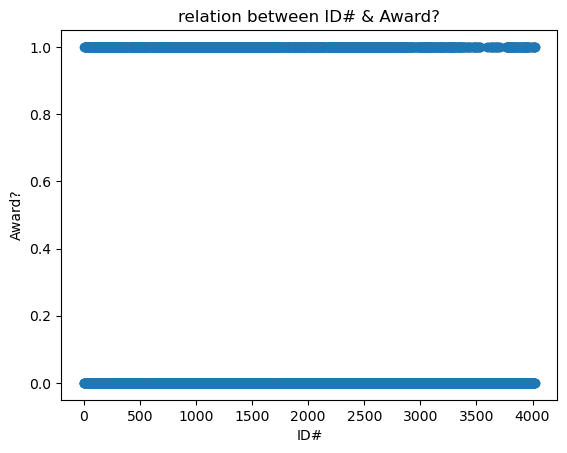

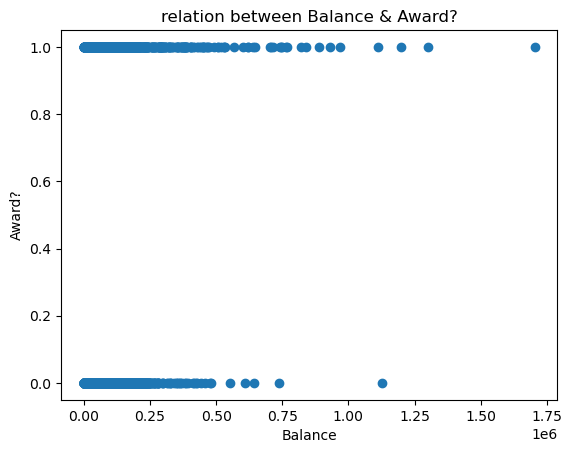

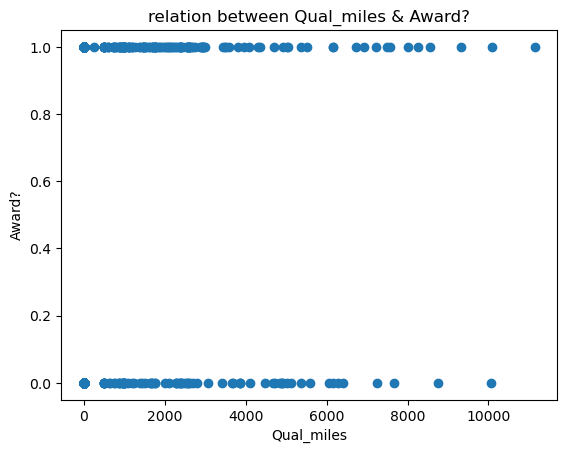

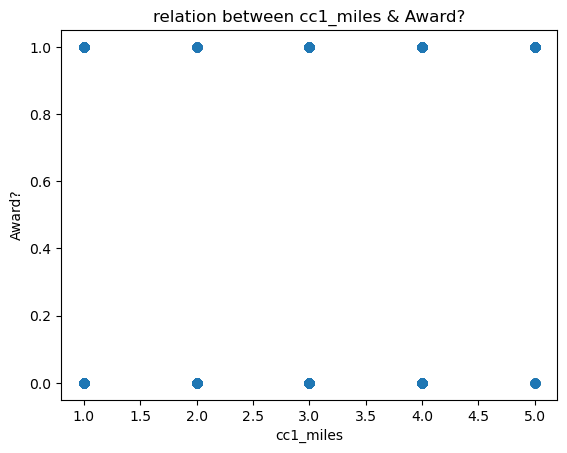

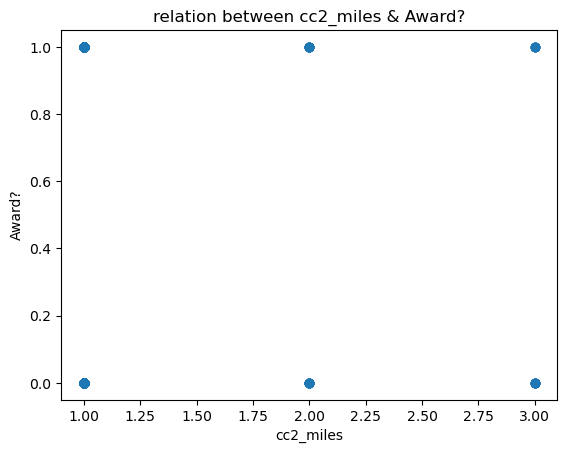

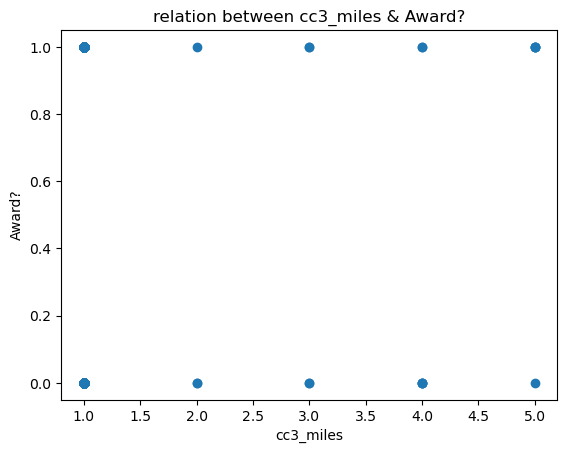

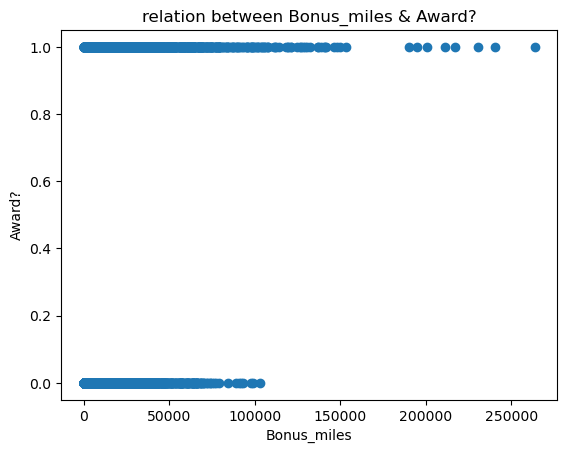

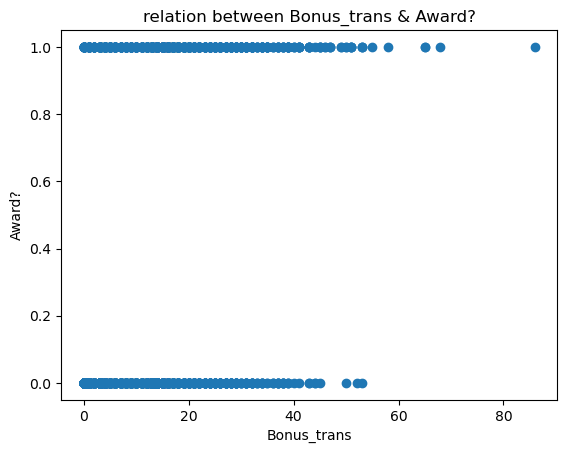

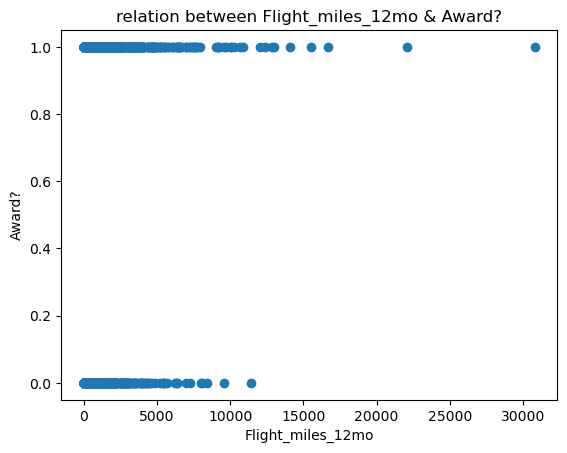

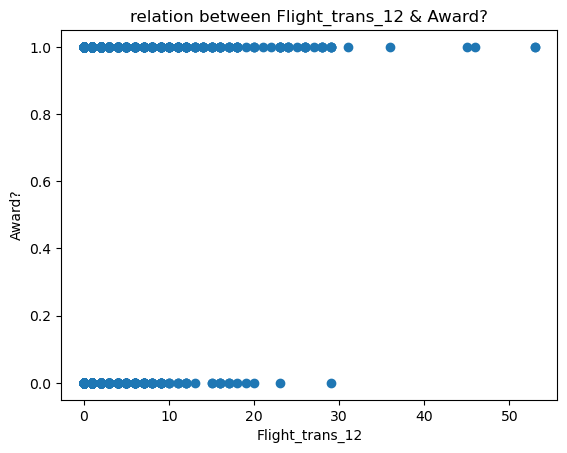

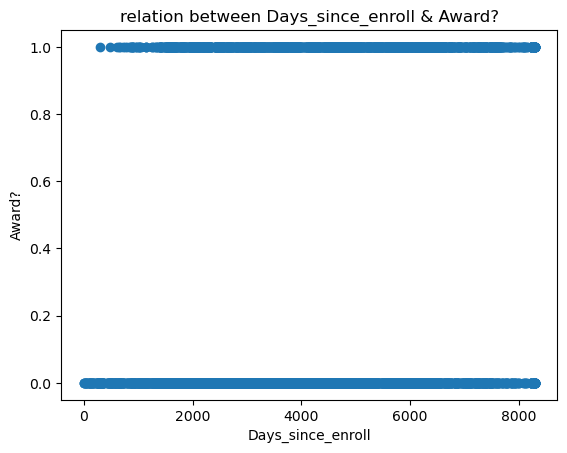

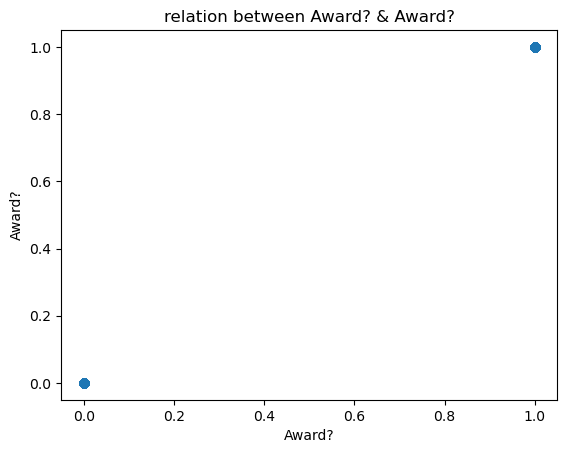

In [ ]:

for i in numeric_data:
# Plot the independent variable on x-axis  Plot the dependent variable on y-axis
    plt.scatter(x=df[i],y=df['Award?'])
    plt.title(f"relation between {i} & {'Award?'}")
   # plt.plot(df[i],df["Price"])
    plt.plot()
    plt.xlabel(i)
    plt.ylabel("Award?")
    plt.show()

### Create pairplot with only scatter plots

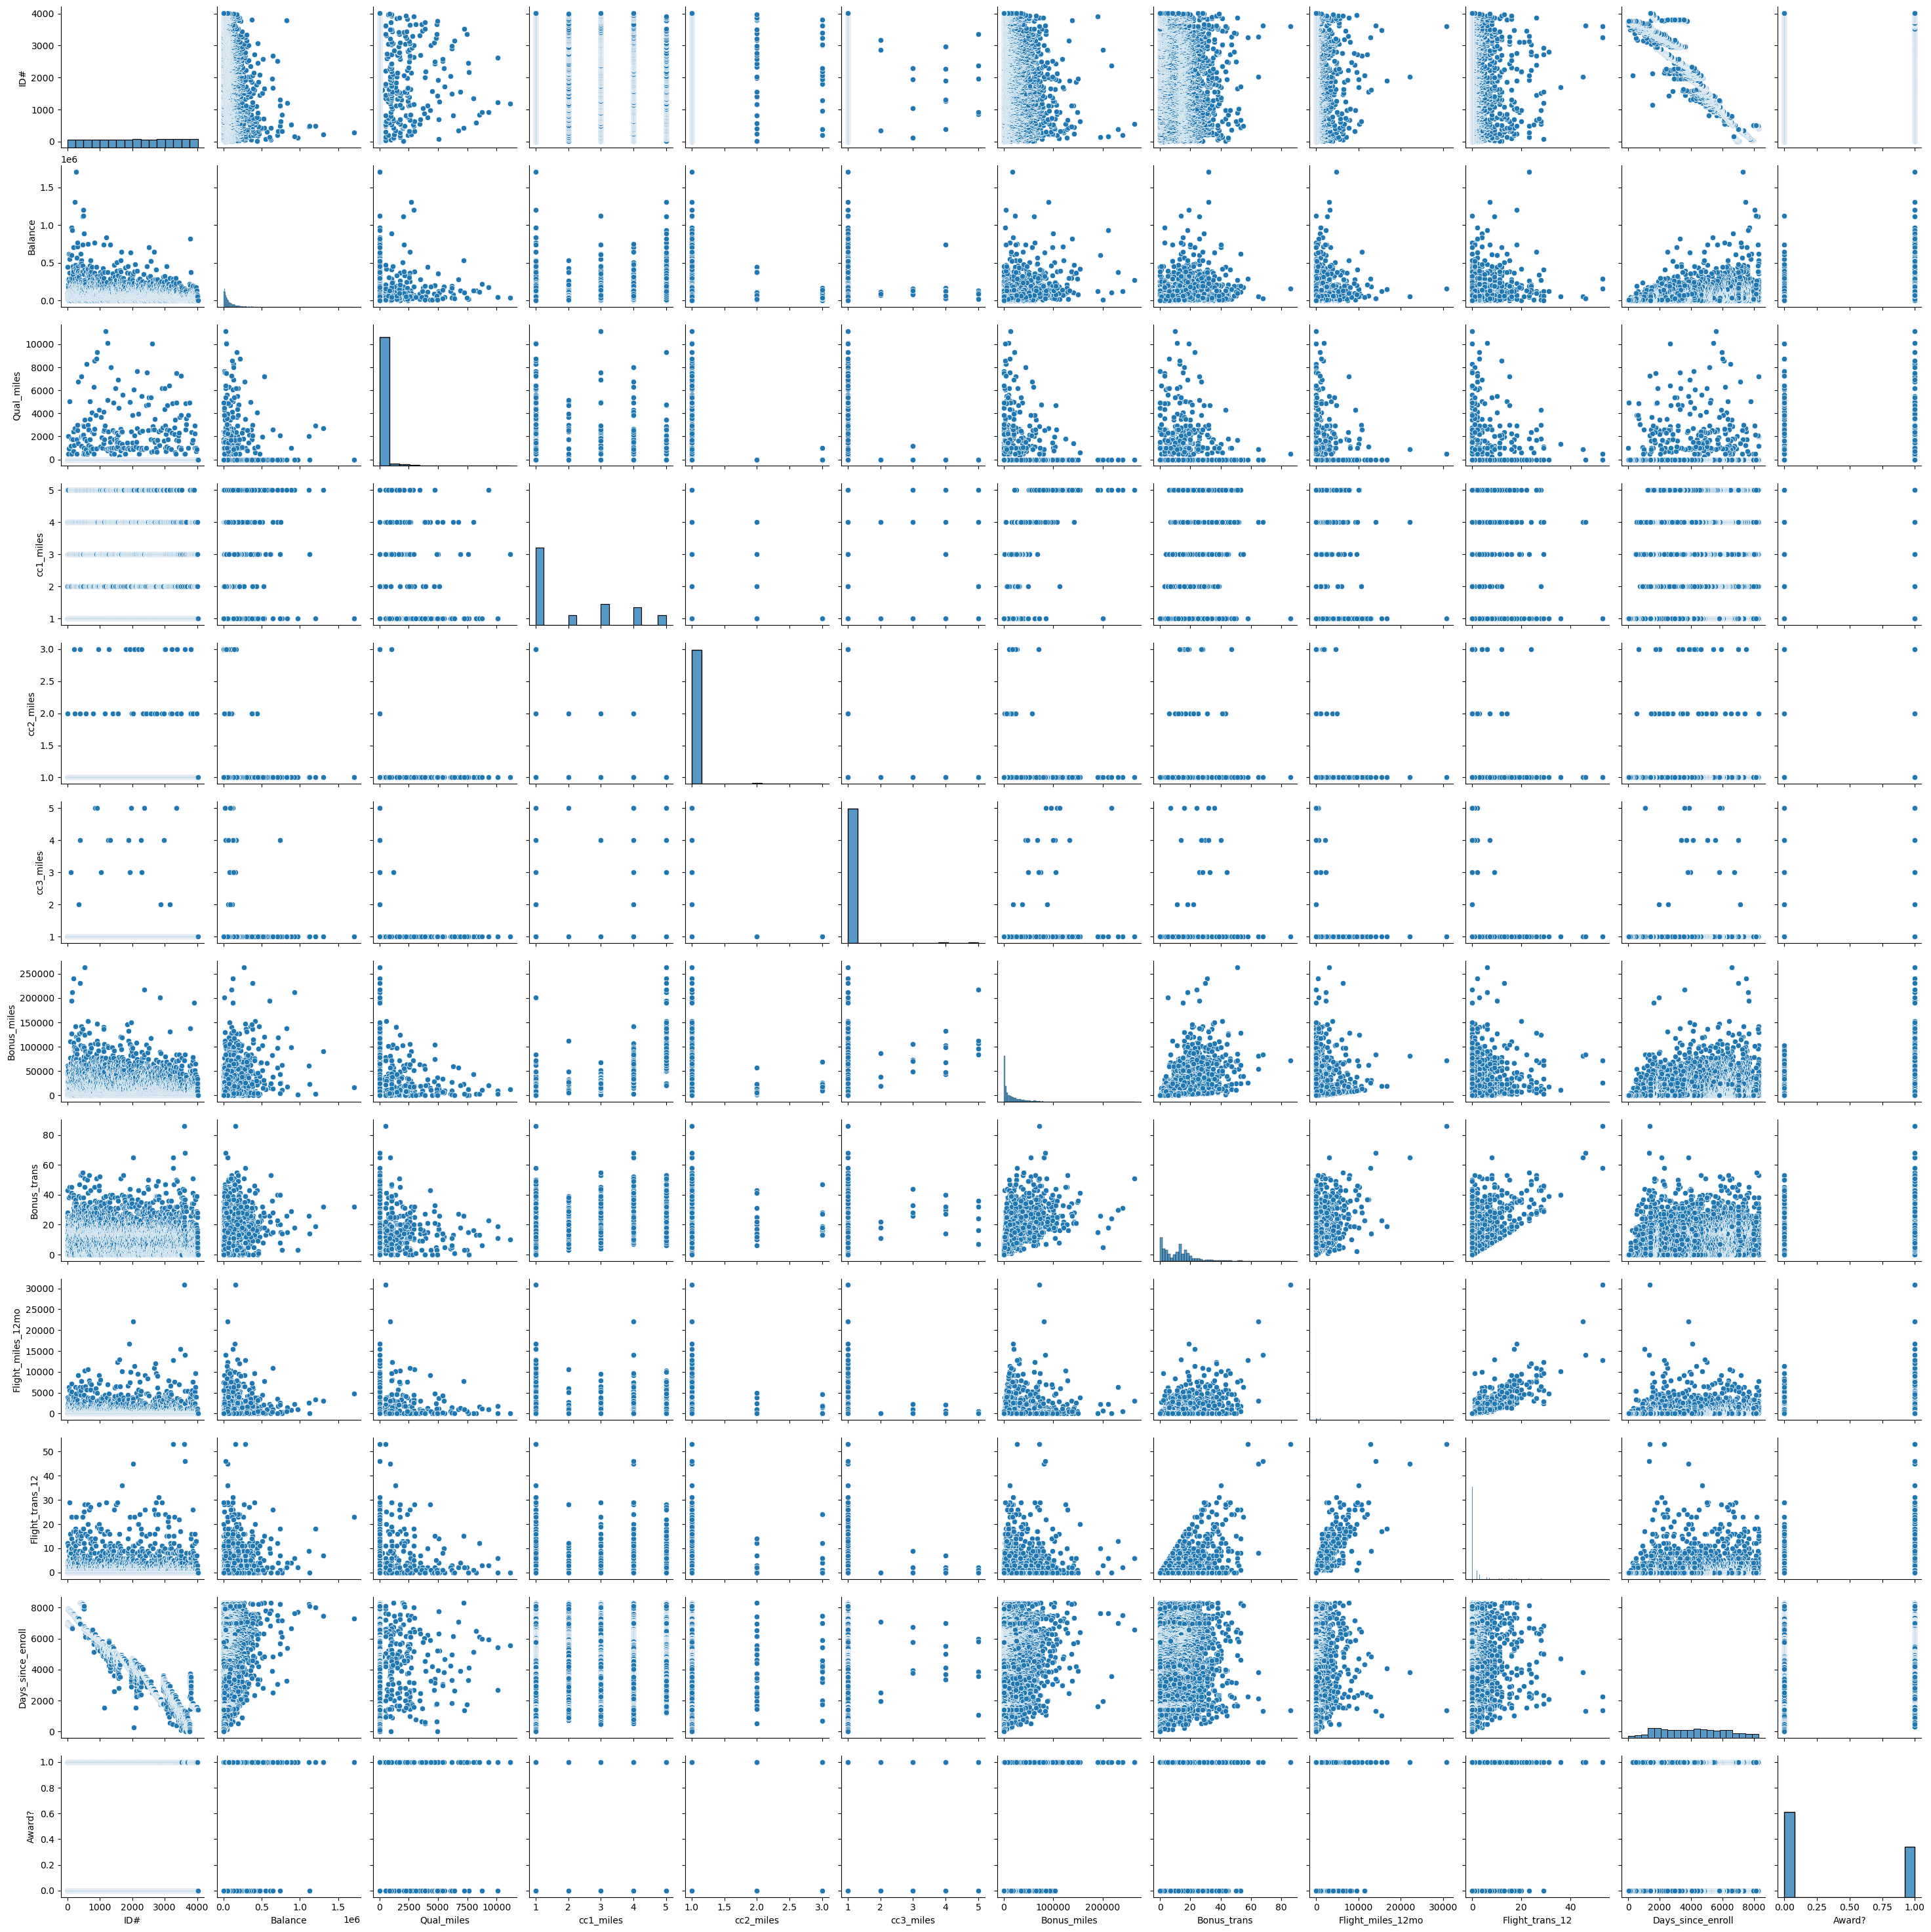

In [ ]:
sns.pairplot(df, kind='scatter')
# Display the plot
plt.show()

# scale features if necceray

In [ ]:
# Drop the 'Award' column
df= df.drop('Award?', axis=1)

In [ ]:
list(df)

['ID#',
 'Balance',
 'Qual_miles',
 'cc1_miles',
 'cc2_miles',
 'cc3_miles',
 'Bonus_miles',
 'Bonus_trans',
 'Flight_miles_12mo',
 'Flight_trans_12',
 'Days_since_enroll']

## Standardize Both, Combine, Then DBSCAN:The goal is to prepare your data so that DBSCAN can accurately measure the "distance" between data points, regardless of whether they are continuous or discrete.

- Pros: This is often the best approach. Both continuous and discrete variables are on a similar scale, making the clustering more accurate.
- Cons: You need to find a way to standardize your discrete variables (like converting them to a scale between 0 and 1).

In [ ]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

ss_x=pd.DataFrame(ss.fit_transform(df))
ss_x.columns=list(df)
ss_x

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0    -1.735125 -0.451141   -0.186299  -0.769578  -0.098242  -0.062767   
1    -1.734263 -0.539457   -0.186299  -0.769578  -0.098242  -0.062767   
2    -1.733402 -0.320031   -0.186299  -0.769578  -0.098242  -0.062767   
3    -1.732540 -0.583799   -0.186299  -0.769578  -0.098242  -0.062767   
4    -1.731679  0.239678   -0.186299   1.409471  -0.098242  -0.062767   
...        ...       ...         ...        ...        ...        ...   
3994  1.725097 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767   
3995  1.725958 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767   
3996  1.726820 -0.000043   -0.186299   0.683121  -0.098242  -0.062767   
3997  1.727682 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767   
3998  1.728543 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0       -0.702786    -1.104065          -0.328603        -0.362168   
1       -0.701088    -0.999926          -0.328603        -0.362168   
2       -0.539253    -0.791649          -0.328603        -0.362168   
3       -0.689286    -1.104065          -0.328603        -0.362168   
4        1.083121     1.499394           1.154932         0.692490   
...           ...          ...                ...              ...   
3994    -0.356960    -0.791649          -0.185750        -0.098503   
3995    -0.669367    -0.687511          -0.328603        -0.362168   
3996     0.343804    -0.375096          -0.328603        -0.362168   
3997    -0.689286    -1.104065           0.028531        -0.098503   
3998    -0.709992    -1.208203          -0.328603        -0.362168   

      Days_since_enroll  
0              1.395454  
1              1.379957  
2              1.411920  
3              1.372208  
4              1.363975  
...                 ...  
3994          -1.315120  
3995          -1.318994  
3996          -1.315604  
3997          -1.316088  
3998          -1.317541  

[3999 rows x 11 columns]

In [ ]:
from sklearn.cluster import DBSCAN   # to generate clusters
dbscan = DBSCAN(eps=3,min_samples=3)
dbscan.fit(ss_x)
dbscan.fit_predict(ss_x)
entire_df_standarrizd=dbscan.fit_predict(ss_x)
entire_df_standarrizd=pd.DataFrame(entire_df_standarrizd, )
entire_df_standarrizd.columns=["new"]
entire_df_standarrizd[entire_df_standarrizd["new"]==-1].shape


(47, 1)

# Combine Standardized Continuous Variables and Discrete Variables:
### Discrete variables might still be on a different scale, which could cause problems.
-  DBSCAN Sensitivity: DBSCAN is sensitive to the scale of the features. Standardizing continuous variables ensures they are on a comparable scale, preventing any single feature from dominating due to its range.

-  Discrete Variables: Including discrete variables without standardizing them helps retain their original impact, particularly if they are counts or binary values.

In [ ]:
a=df.iloc[: ,[1,2,6,8,10]]
a

Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll
0       28143           0          174                  0               7000
1       19244           0          215                  0               6968
2       41354           0         4123                  0               7034
3       14776           0          500                  0               6952
4       97752           0        43300               2077               6935
...       ...         ...          ...                ...                ...
3994    18476           0         8525                200               1403
3995    64385           0          981                  0               1395
3996    73597           0        25447                  0               1402
3997    54899           0          500                500               1401
3998     3016           0            0                  0               1398

[3999 rows x 5 columns]

In [ ]:
b=df.iloc[:,[3,4,5,7,9]]
b

cc1_miles  cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12
0             1          1          1            1                0
1             1          1          1            2                0
2             1          1          1            4                0
3             1          1          1            1                0
4             4          1          1           26                4
...         ...        ...        ...          ...              ...
3994          1          1          1            4                1
3995          1          1          1            5                0
3996          3          1          1            8                0
3997          1          1          1            1                1
3998          1          1          1            0                0

[3999 rows x 5 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
conti=pd.DataFrame(ss.fit_transform(a))
conti.columns=list(a)
conti

Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll
0    -0.451141   -0.186299    -0.702786          -0.328603           1.395454
1    -0.539457   -0.186299    -0.701088          -0.328603           1.379957
2    -0.320031   -0.186299    -0.539253          -0.328603           1.411920
3    -0.583799   -0.186299    -0.689286          -0.328603           1.372208
4     0.239678   -0.186299     1.083121           1.154932           1.363975
...        ...         ...          ...                ...                ...
3994 -0.547079   -0.186299    -0.356960          -0.185750          -1.315120
3995 -0.091465   -0.186299    -0.669367          -0.328603          -1.318994
3996 -0.000043   -0.186299     0.343804          -0.328603          -1.315604
3997 -0.185607   -0.186299    -0.689286           0.028531          -1.316088
3998 -0.700508   -0.186299    -0.709992          -0.328603          -1.317541

[3999 rows x 5 columns]

In [ ]:
combined_df = pd.concat([conti, b],axis=1)
combined_df

Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
0    -0.451141   -0.186299    -0.702786          -0.328603           1.395454   
1    -0.539457   -0.186299    -0.701088          -0.328603           1.379957   
2    -0.320031   -0.186299    -0.539253          -0.328603           1.411920   
3    -0.583799   -0.186299    -0.689286          -0.328603           1.372208   
4     0.239678   -0.186299     1.083121           1.154932           1.363975   
...        ...         ...          ...                ...                ...   
3994 -0.547079   -0.186299    -0.356960          -0.185750          -1.315120   
3995 -0.091465   -0.186299    -0.669367          -0.328603          -1.318994   
3996 -0.000043   -0.186299     0.343804          -0.328603          -1.315604   
3997 -0.185607   -0.186299    -0.689286           0.028531          -1.316088   
3998 -0.700508   -0.186299    -0.709992          -0.328603          -1.317541   

      cc1_miles  cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12  
0             1          1          1            1                0  
1             1          1          1            2                0  
2             1          1          1            4                0  
3             1          1          1            1                0  
4             4          1          1           26                4  
...         ...        ...        ...          ...              ...  
3994          1          1          1            4                1  
3995          1          1          1            5                0  
3996          3          1          1            8                0  
3997          1          1          1            1                1  
3998          1          1          1            0                0  

[3999 rows x 10 columns]

# Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.



# DSBCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3,min_samples=3)
dbscan.fit(combined_df)

DBSCAN(eps=3, min_samples=3)

In [ ]:
dbscan.fit_predict(combined_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
combined_df["dbscan"]=dbscan.fit_predict(combined_df)
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0            1                  0                0               7000  
1            2                  0                0               6968  
2            4                  0                0               7034  
3            1                  0                0               6952  
4           26               2077                4               6935

In [ ]:
combined_df[combined_df['dbscan'] ==-1].shape

(160, 11)

In [ ]:
combined_df=combined_df[combined_df["dbscan"] !=-1]    #   != -1  removes outliers
combined_df

Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
0    -0.451141   -0.186299    -0.702786          -0.328603           1.395454   
1    -0.539457   -0.186299    -0.701088          -0.328603           1.379957   
2    -0.320031   -0.186299    -0.539253          -0.328603           1.411920   
3    -0.583799   -0.186299    -0.689286          -0.328603           1.372208   
4     0.239678   -0.186299     1.083121           1.154932           1.363975   
...        ...         ...          ...                ...                ...   
3994 -0.547079   -0.186299    -0.356960          -0.185750          -1.315120   
3995 -0.091465   -0.186299    -0.669367          -0.328603          -1.318994   
3996 -0.000043   -0.186299     0.343804          -0.328603          -1.315604   
3997 -0.185607   -0.186299    -0.689286           0.028531          -1.316088   
3998 -0.700508   -0.186299    -0.709992          -0.328603          -1.317541   

      cc1_miles  cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12  dbscan  
0             1          1          1            1                0       0  
1             1          1          1            2                0       0  
2             1          1          1            4                0       0  
3             1          1          1            1                0       0  
4             4          1          1           26                4       0  
...         ...        ...        ...          ...              ...     ...  
3994          1          1          1            4                1       0  
3995          1          1          1            5                0       0  
3996          3          1          1            8                0       0  
3997          1          1          1            1                1       0  
3998          1          1          1            0                0       0  

[3839 rows x 11 columns]

In [ ]:
from sklearn.metrics import silhouette_score
m11= silhouette_score(combined_df,combined_df["dbscan"])
print("sihouette score: ",m11)


sihouette score:  0.5192378048013038


In [ ]:
combined_df['dbscan'].value_counts()

dbscan
0    3813
5       6
1       4
2       4
3       3
4       3
7       3
6       3
Name: count, dtype: int64

-  for clusters=6 silhouette_score   is 0.51 which is near to +1 indicates   excellnt   cluster formation.  & Where we have lowest deviation with in the cluster and highest deviation in between the clusters.

-   for dbscan it is not reqierd to give  cluster numbers like we gave for k means n =5 , dbscan automatically forms clusters.

# Visualization:
-  Visualize the clustering results using scatter plots or other suitable visualization techniques.
-   Plot the clusters with different colours to visualize the separation of data points belonging to different clusters


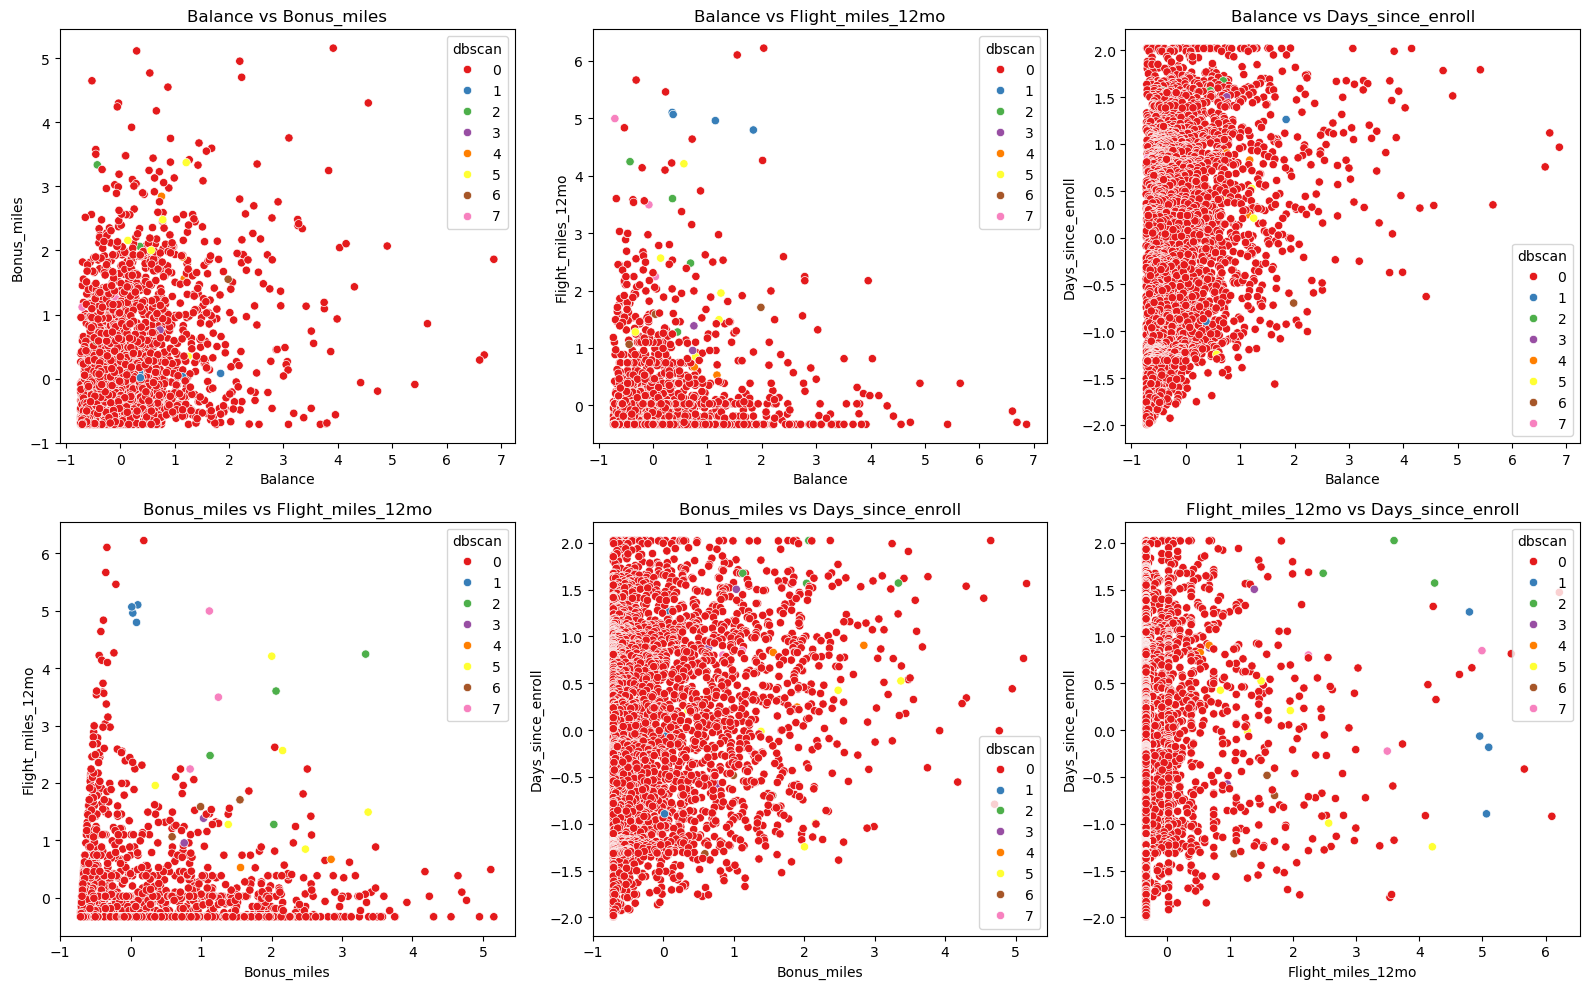

In [ ]:


# Plotting clusters for different pairs of features
feature_pairs = [('Balance', 'Bonus_miles'), ('Balance', 'Flight_miles_12mo'), ('Balance', 'Days_since_enroll'),
                 ('Bonus_miles', 'Flight_miles_12mo'), ('Bonus_miles', 'Days_since_enroll'), ('Flight_miles_12mo', 'Days_since_enroll')]

plt.figure(figsize=(16, 10))

# Plot each pair of features
for i, (feature1, feature2) in enumerate(feature_pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=combined_df[feature1], y=combined_df[feature2], hue=combined_df['dbscan'], palette='Set1', legend='full')
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.show()

# kmeans

In [ ]:
df2=combined_df.iloc[: ,: 10]
df2

Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
0    -0.451141   -0.186299    -0.702786          -0.328603           1.395454   
1    -0.539457   -0.186299    -0.701088          -0.328603           1.379957   
2    -0.320031   -0.186299    -0.539253          -0.328603           1.411920   
3    -0.583799   -0.186299    -0.689286          -0.328603           1.372208   
4     0.239678   -0.186299     1.083121           1.154932           1.363975   
...        ...         ...          ...                ...                ...   
3994 -0.547079   -0.186299    -0.356960          -0.185750          -1.315120   
3995 -0.091465   -0.186299    -0.669367          -0.328603          -1.318994   
3996 -0.000043   -0.186299     0.343804          -0.328603          -1.315604   
3997 -0.185607   -0.186299    -0.689286           0.028531          -1.316088   
3998 -0.700508   -0.186299    -0.709992          -0.328603          -1.317541   

      cc1_miles  cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12  
0             1          1          1            1                0  
1             1          1          1            2                0  
2             1          1          1            4                0  
3             1          1          1            1                0  
4             4          1          1           26                4  
...         ...        ...        ...          ...              ...  
3994          1          1          1            4                1  
3995          1          1          1            5                0  
3996          3          1          1            8                0  
3997          1          1          1            1                1  
3998          1          1          1            0                0  

[3839 rows x 10 columns]

In [ ]:
df3=combined_df.iloc[: ,[0 ,1,2,3,4,8,9]]
df3
k_scores = []

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i,n_init=20)
    df3["kmeans"] = cluster.fit_predict(df3)
    k_scores.append(silhouette_score(df3,df3["kmeans"]) )


k_scores
#  K =9 ,0.5964413583051368,combined_df.iloc[: ,0 :5]
#k=2  [0.5584072856928932,combined_df.iloc[: ,[0 ,1,2,3,4,8,9]]
# we can conclude that with  [0 :5]  this  continous standardized variable  giving highest silhouette_score with k =9 hence clustr formation is better if take only few standardized variables

C:\Users\Basma\AppData\Local\Temp\ipykernel_11180\1034961304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["kmeans"] = cluster.fit_predict(df3)
C:\Users\Basma\AppData\Local\Temp\ipykernel_11180\1034961304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["kmeans"] = cluster.fit_predict(df3)
C:\Users\Basma\AppData\Local\Temp\ipykernel_11180\1034961304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

[0.5584072856928932,
 0.5554173632300625,
 0.4898386296053889,
 0.4831129841921348,
 0.5048270535150183,
 0.5047764522170654,
 0.4913436262605846,
 0.5027457726710836,
 0.5207121255590776]

In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=5)
cluster.fit(df2)
df2["kmeans"] = cluster.fit_predict(df2)
df2

Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
0    -0.451141   -0.186299    -0.702786          -0.328603           1.395454   
1    -0.539457   -0.186299    -0.701088          -0.328603           1.379957   
2    -0.320031   -0.186299    -0.539253          -0.328603           1.411920   
3    -0.583799   -0.186299    -0.689286          -0.328603           1.372208   
4     0.239678   -0.186299     1.083121           1.154932           1.363975   
...        ...         ...          ...                ...                ...   
3994 -0.547079   -0.186299    -0.356960          -0.185750          -1.315120   
3995 -0.091465   -0.186299    -0.669367          -0.328603          -1.318994   
3996 -0.000043   -0.186299     0.343804          -0.328603          -1.315604   
3997 -0.185607   -0.186299    -0.689286           0.028531          -1.316088   
3998 -0.700508   -0.186299    -0.709992          -0.328603          -1.317541   

      cc1_miles  cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12  kmeans  
0             1          1          1            1                0       2  
1             1          1          1            2                0       2  
2             1          1          1            4                0       2  
3             1          1          1            1                0       2  
4             4          1          1           26                4       3  
...         ...        ...        ...          ...              ...     ...  
3994          1          1          1            4                1       2  
3995          1          1          1            5                0       2  
3996          3          1          1            8                0       0  
3997          1          1          1            1                1       2  
3998          1          1          1            0                0       2  

[3839 rows x 11 columns]

In [ ]:
df2["kmeans"].value_counts()
# as we can see clusters 1      conatins higest points 1551 but . we can conclude no biased cluster formation

kmeans
2    1466
1    1113
0     928
3     259
4      73
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score
m1= silhouette_score(df2,df2["kmeans"])

# HERE df2 containts 2 col's and df2["kmeans"] has all clusters formed ( 1 2 3 4 5 form clusters are 0 1 2 3 4)
#Where we have lowest deviation with in the cluster and highest deviation in between the clusters for those linkage method or kmeans give our silhoutte score will gives the highest score.
#it will calculate ex:
#score will gives the highest score.
print("sihouette score: ",m1)


sihouette score:  0.44552176781288466


### Evaluation and Performance Metrics:
- Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [ ]:
k_scores = []

for i in range(2, 11):
    from sklearn.cluster import KMeans
    cluster = KMeans(n_clusters=i,n_init=20)
    df2["kmeans"] = cluster.fit_predict(df2)
    k_scores.append(silhouette_score(df2,df2["kmeans"]) )


k_scores
#calculating silhouette_score   for diff k values .

[0.5507307856277064,
 0.5427251492546332,
 0.4758181385847318,
 0.5083635997002431,
 0.42645151118167,
 0.4841143638710771,
 0.4871870581289951,
 0.43338916788854187,
 0.5200508056445992]

In [ ]:
cluster.labels_

array([1, 1, 3, ..., 3, 1, 1])

### for k =2 silhouette_score   is 0.55 which is near to +1 indicates   excellnt   cluster formation.  & Where we have lowest deviation with in the cluster and highest deviation in between the clusters

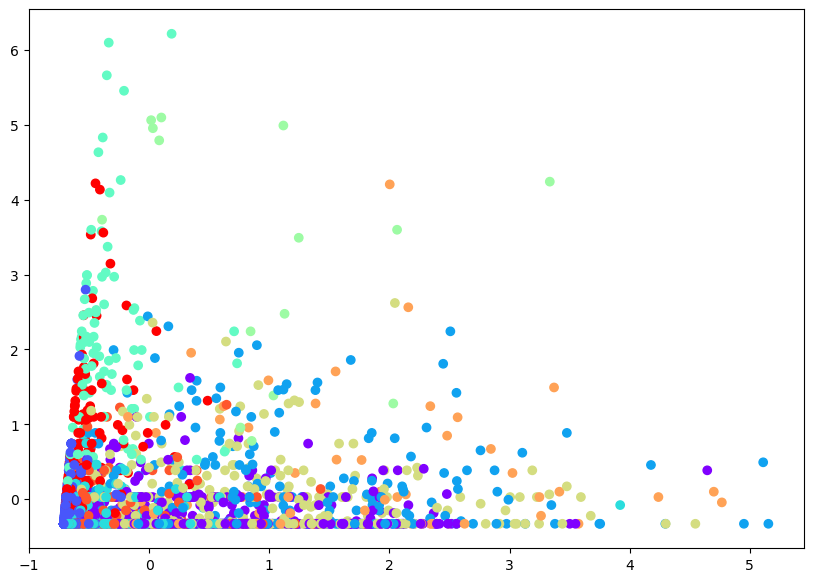

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df2.iloc[:,2], df2.iloc[:,3], c=cluster.labels_, cmap='rainbow')
plt.show()

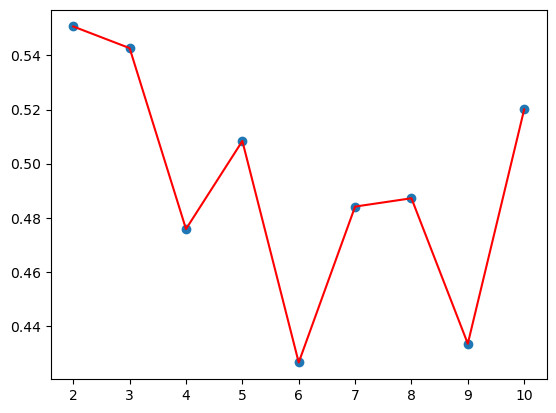

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=range(2, 11),y=k_scores)
plt.plot(range(2, 11),k_scores,color='red')
plt.show()


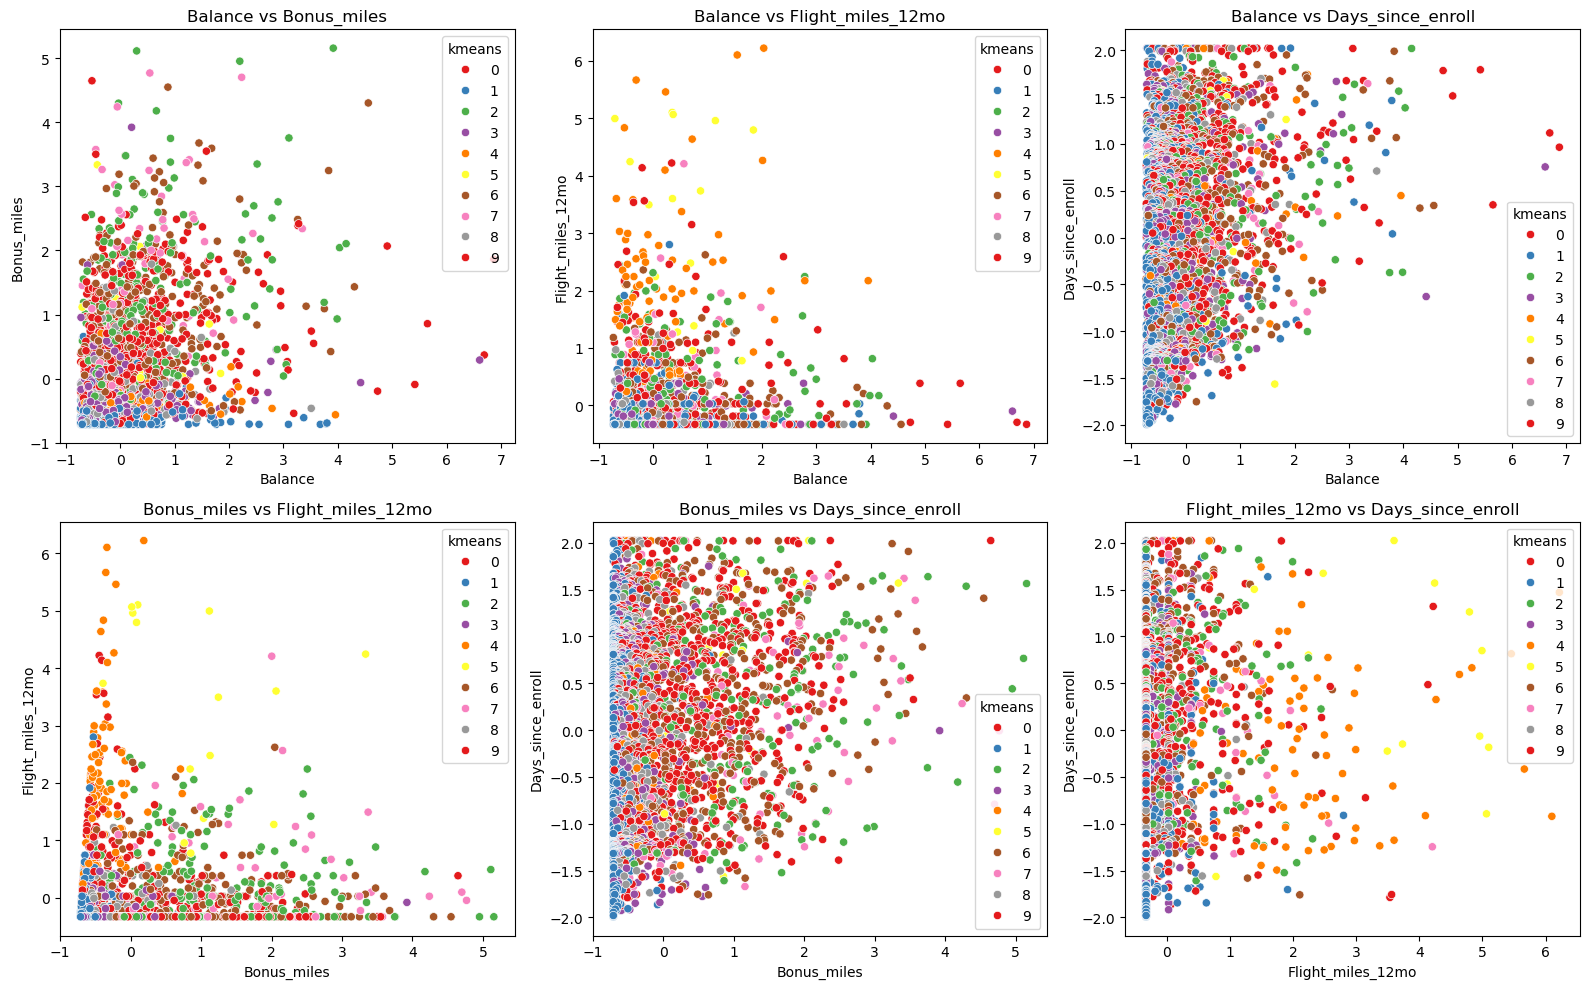

In [ ]:

# Plotting clusters for different pairs of features
feature_pairs = [('Balance', 'Bonus_miles'), ('Balance', 'Flight_miles_12mo'), ('Balance', 'Days_since_enroll'),
                 ('Bonus_miles', 'Flight_miles_12mo'), ('Bonus_miles', 'Days_since_enroll'), ('Flight_miles_12mo', 'Days_since_enroll')]

plt.figure(figsize=(16, 10))

# Plot each pair of features
for i, (feature1, feature2) in enumerate(feature_pairs, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df2[feature1], y=df2[feature2], hue=df2['kmeans'], palette='Set1', legend='full')
    plt.title(f'{feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()
plt.show()

#  AgglomerativeClustering  :


-  **Hierarchical Clustering:**
- Doesn't Require Specified Clusters Initially: Hierarchical clustering methods, like agglomerative clustering, build a tree-like structure (dendrogram) that shows how data points are merged step-by-step. **You can then choose the number of clusters by cutting the dendrogram at the desired level, which can be done after the clustering process.**

- Flexibility: This allows for flexibility in choosing the number of clusters based on the dendrogram.
- *Hierarchical Clustering generally builds a dendrogram and doesn't need a specified number of clusters initially.*
  
- **Agglomerative Clustering (a Type of Hierarchical Clustering):**
  
- Can Be Used with a Specified Number of Clusters: In practical applications and specific implementations like sklearn's AgglomerativeClustering, you have the option to specify the number of clusters (n_clusters) if you want to directly get a certain number of clusters without manually cutting the dendrogram.

- Convenience: Specifying n_clusters makes it convenient to directly obtain a fixed number of clusters, similar to how KMeans works.

In [ ]:
X=df2.iloc[: ,: 10]
X

Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
0    -0.451141   -0.186299    -0.702786          -0.328603           1.395454   
1    -0.539457   -0.186299    -0.701088          -0.328603           1.379957   
2    -0.320031   -0.186299    -0.539253          -0.328603           1.411920   
3    -0.583799   -0.186299    -0.689286          -0.328603           1.372208   
4     0.239678   -0.186299     1.083121           1.154932           1.363975   
...        ...         ...          ...                ...                ...   
3994 -0.547079   -0.186299    -0.356960          -0.185750          -1.315120   
3995 -0.091465   -0.186299    -0.669367          -0.328603          -1.318994   
3996 -0.000043   -0.186299     0.343804          -0.328603          -1.315604   
3997 -0.185607   -0.186299    -0.689286           0.028531          -1.316088   
3998 -0.700508   -0.186299    -0.709992          -0.328603          -1.317541   

      cc1_miles  cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12  
0             1          1          1            1                0  
1             1          1          1            2                0  
2             1          1          1            4                0  
3             1          1          1            1                0  
4             4          1          1           26                4  
...         ...        ...        ...          ...              ...  
3994          1          1          1            4                1  
3995          1          1          1            5                0  
3996          3          1          1            8                0  
3997          1          1          1            1                1  
3998          1          1          1            0                0  

[3839 rows x 10 columns]

In [ ]:
X1=df2.iloc[: ,[0,2,3,4,5,6,7,8,9,10]]
X1

Balance  Bonus_miles  Flight_miles_12mo  Days_since_enroll  cc1_miles  \
0    -0.451141    -0.702786          -0.328603           1.395454          1   
1    -0.539457    -0.701088          -0.328603           1.379957          1   
2    -0.320031    -0.539253          -0.328603           1.411920          1   
3    -0.583799    -0.689286          -0.328603           1.372208          1   
4     0.239678     1.083121           1.154932           1.363975          4   
...        ...          ...                ...                ...        ...   
3994 -0.547079    -0.356960          -0.185750          -1.315120          1   
3995 -0.091465    -0.669367          -0.328603          -1.318994          1   
3996 -0.000043     0.343804          -0.328603          -1.315604          3   
3997 -0.185607    -0.689286           0.028531          -1.316088          1   
3998 -0.700508    -0.709992          -0.328603          -1.317541          1   

      cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12  kmeans  
0             1          1            1                0       1  
1             1          1            2                0       1  
2             1          1            4                0       3  
3             1          1            1                0       1  
4             1          1           26                4       2  
...         ...        ...          ...              ...     ...  
3994          1          1            4                1       3  
3995          1          1            5                0       3  
3996          1          1            8                0       3  
3997          1          1            1                1       1  
3998          1          1            0                0       1  

[3839 rows x 10 columns]

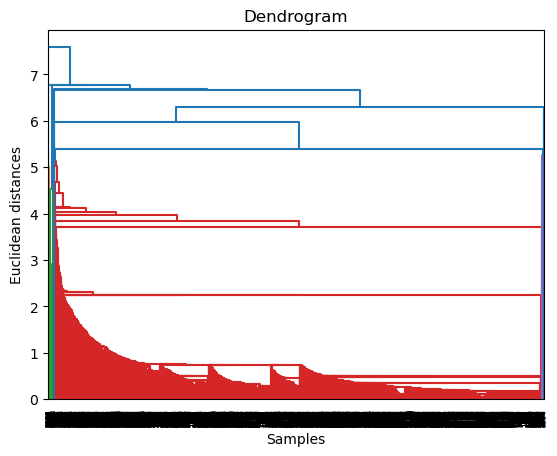

In [ ]:
import scipy.cluster.hierarchy  as sch  #plot dendrogram

#create dendrogram
dendrogram=sch.dendrogram(sch.linkage(ss_x,method="single"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

### single linkage method

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,linkage='single')
cluster.fit(X)

X["Agg_single"]=cluster.fit_predict(X)



from sklearn.metrics import silhouette_score
m1= silhouette_score(X,X["Agg_single"])
print("sihouette score: ",m1)
X["Agg_single"].value_counts()

sihouette score:  0.5415703842531077


Agg_single
0    3822
2       7
1       4
4       3
3       3
Name: count, dtype: int64

## complete linkage method

In [ ]:
Y=df2.iloc[: ,: 10]
Y
#Y=df2.iloc[: ,[0,2,3,4,5,6,7,8,9]]


Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
0    -0.451141   -0.186299    -0.702786          -0.328603           1.395454   
1    -0.539457   -0.186299    -0.701088          -0.328603           1.379957   
2    -0.320031   -0.186299    -0.539253          -0.328603           1.411920   
3    -0.583799   -0.186299    -0.689286          -0.328603           1.372208   
4     0.239678   -0.186299     1.083121           1.154932           1.363975   
...        ...         ...          ...                ...                ...   
3994 -0.547079   -0.186299    -0.356960          -0.185750          -1.315120   
3995 -0.091465   -0.186299    -0.669367          -0.328603          -1.318994   
3996 -0.000043   -0.186299     0.343804          -0.328603          -1.315604   
3997 -0.185607   -0.186299    -0.689286           0.028531          -1.316088   
3998 -0.700508   -0.186299    -0.709992          -0.328603          -1.317541   

      cc1_miles  cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12  
0             1          1          1            1                0  
1             1          1          1            2                0  
2             1          1          1            4                0  
3             1          1          1            1                0  
4             4          1          1           26                4  
...         ...        ...        ...          ...              ...  
3994          1          1          1            4                1  
3995          1          1          1            5                0  
3996          3          1          1            8                0  
3997          1          1          1            1                1  
3998          1          1          1            0                0  

[3839 rows x 10 columns]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,linkage='complete')
cluster.fit(Y)

Y["Agg_complete"]=cluster.fit_predict(Y)



from sklearn.metrics import silhouette_score
m1= silhouette_score(Y,Y["Agg_complete"])
print("sihouette score: ",m1)

Y["Agg_complete"].value_counts()

sihouette score:  0.5268981360219552


Agg_complete
4    1828
3    1645
1     296
2      39
0      31
Name: count, dtype: int64

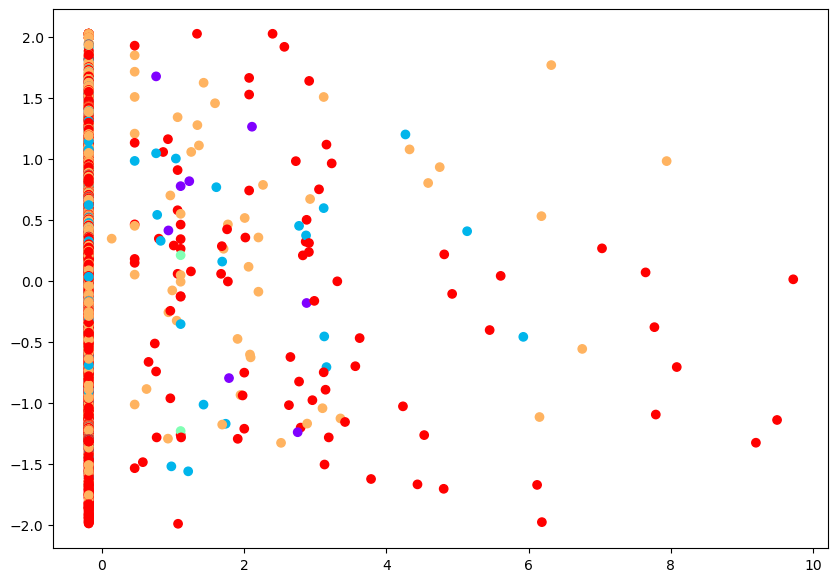

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(Y.iloc[:,1], Y.iloc[:,4], c=cluster.labels_, cmap='rainbow')
plt.show()


## 'average'linkage method

In [ ]:
Z=df2.iloc[: ,: 10]
Z

Balance  Qual_miles  Bonus_miles  Flight_miles_12mo  Days_since_enroll  \
0    -0.451141   -0.186299    -0.702786          -0.328603           1.395454   
1    -0.539457   -0.186299    -0.701088          -0.328603           1.379957   
2    -0.320031   -0.186299    -0.539253          -0.328603           1.411920   
3    -0.583799   -0.186299    -0.689286          -0.328603           1.372208   
4     0.239678   -0.186299     1.083121           1.154932           1.363975   
...        ...         ...          ...                ...                ...   
3994 -0.547079   -0.186299    -0.356960          -0.185750          -1.315120   
3995 -0.091465   -0.186299    -0.669367          -0.328603          -1.318994   
3996 -0.000043   -0.186299     0.343804          -0.328603          -1.315604   
3997 -0.185607   -0.186299    -0.689286           0.028531          -1.316088   
3998 -0.700508   -0.186299    -0.709992          -0.328603          -1.317541   

      cc1_miles  cc2_miles  cc3_miles  Bonus_trans  Flight_trans_12  
0             1          1          1            1                0  
1             1          1          1            2                0  
2             1          1          1            4                0  
3             1          1          1            1                0  
4             4          1          1           26                4  
...         ...        ...        ...          ...              ...  
3994          1          1          1            4                1  
3995          1          1          1            5                0  
3996          3          1          1            8                0  
3997          1          1          1            1                1  
3998          1          1          1            0                0  

[3839 rows x 10 columns]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,linkage='average')
cluster.fit(Z)

Z["Agg_average"]=cluster.fit_predict(Z)



from sklearn.metrics import silhouette_score
m1= silhouette_score(Z,Z["Agg_average"])
print("sihouette score: ",m1)
Z["Agg_average"].value_counts()



sihouette score:  0.48809895822135224


Agg_average
0    3534
1     275
2      20
4       7
3       3
Name: count, dtype: int64

# # Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.



-  **based on the sihouette score (0.5408426945485517 )we got complte linkage method (with all variables)  with clusters = 5 is given highest value than other two methods,hence we can see from above sinlge and average, complte linkage  method for cluster formation under the AgglomerativeClustering  is best**.

- ***we can conclude that with  [0 :5]  this  continous standardized variable  giving highest silhouette_score[0.59] with k =9 hence cluster formation is better  if take only few standardized variables  but not discrete var***
-  ***for k =2 silhouette_score   is 0.55 which is near to +1 indicates   excellnt   cluster formation.with all variables   & Where we have lowest deviation with in the cluster and highest deviation in between the clusters***